## **Step 0: Get the data && import libraries**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating the dataframe

data = pd.read_csv("Iris.csv")

# Printing the data
print(data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

## **💡 First insights**

In [33]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [45]:
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'SepalLengthCm'}>],
       [<AxesSubplot:title={'center':'SepalWidthCm'}>,
        <AxesSubplot:title={'center':'PetalLengthCm'}>],
       [<AxesSubplot:title={'center':'PetalWidthCm'}>, <AxesSubplot:>]],
      dtype=object)

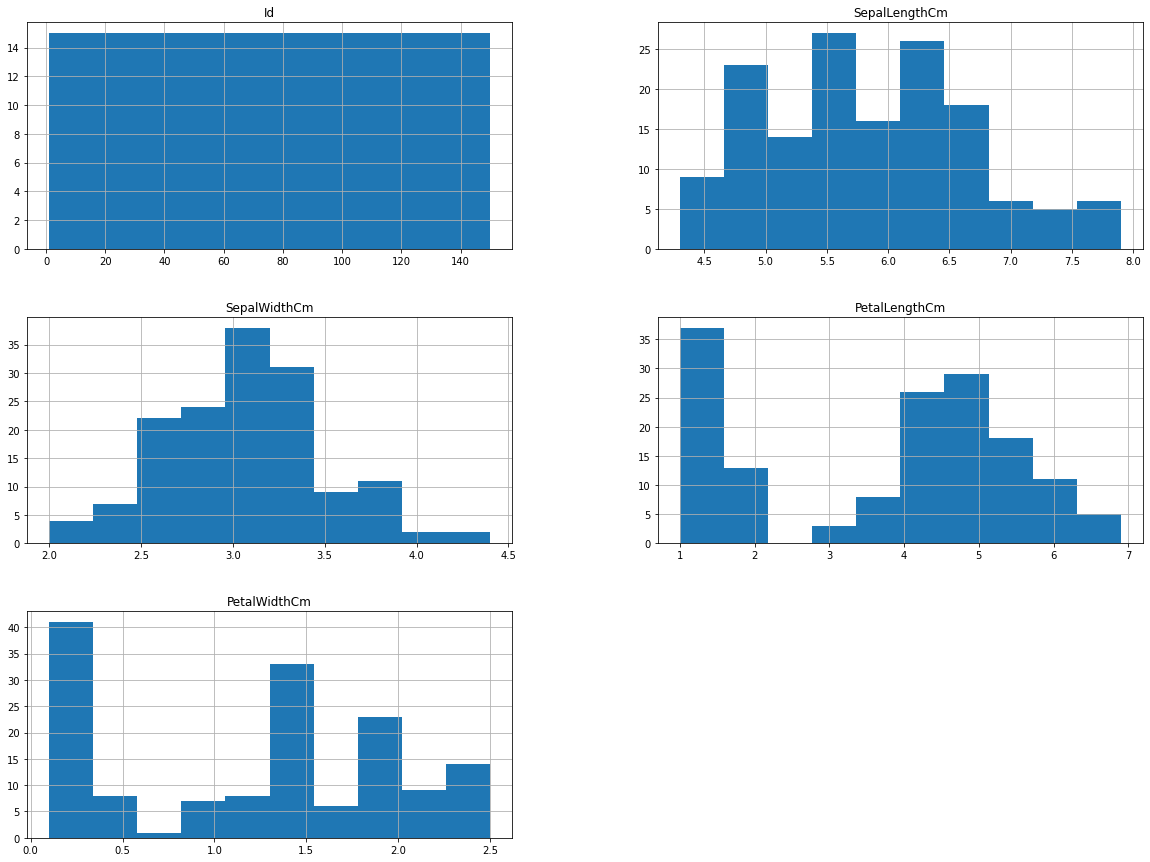

In [53]:
data.hist(figsize=(20,15))

In [14]:
# Extract the training data
x = data.iloc[:,[1,2,3,4]].values

## **The elbow method to determine the optimal number of classes**

In [15]:
from sklearn.cluster import KMeans
from tqdm import tqdm

wcss = []

for i in tqdm(range(1,11)):
  kmeans = KMeans(n_clusters = i, init="k-means++", n_init=10, max_iter=300, random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

print(wcss)

100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 12.74it/s]

[680.8244000000001, 152.36870647733903, 78.94084142614602, 57.317873214285704, 46.56163015873016, 38.930963049671746, 34.19068792479662, 30.06387443273313, 27.879287878787878, 26.048202248044355]


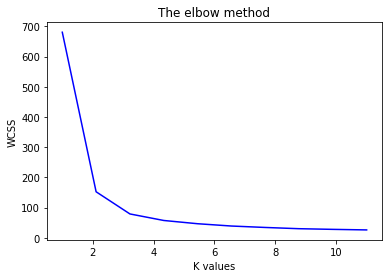

In [16]:
plt.plot(np.linspace(1,11,10),wcss,"b-")
plt.title("The elbow method")
plt.xlabel("K values")
plt.ylabel("WCSS")
plt.show()

*From the graph, k=3 is the perfect number of clusters to go with.*

## **Create a model with 3 clusters and fit it to the data**

In [17]:
model = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
# pred contains the indexes of each class for each flower. variyng from 0 to 2.
pred = model.fit_predict(x)
print("Training complete")

Training complete


## **Plotting the three clusters & their centroids**

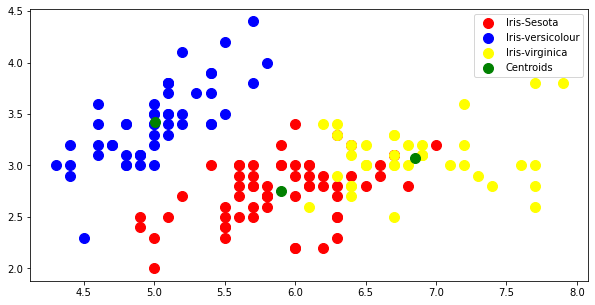

In [24]:
plt.figure(figsize=[10,5])
plt.scatter(x[pred == 0, 0],x[pred == 0, 1] , s=100, c="red", label="Iris-Sesota")
plt.scatter(x[pred == 1, 0],x[pred == 1, 1] , s=100, c="blue", label="Iris-versicolour")
plt.scatter(x[pred == 2, 0],x[pred == 2, 1] , s=100, c="yellow", label="Iris-virginica")


plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'green', label = 'Centroids')
plt.legend()